## Naive Bayes Classifier:

A simple probabilistic model that classifies text based on the likelihood of sentiment categories (positive, negative, neutral). It's fast but less effective for more complex sentences.

For this simple Naive Bayes sentiment analysis task, we will focus on the Texto column for input text and use one of the sentiment labels (for example, textblob_custom_sentiment) as the target variable.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# We'll use 'Texto' for the text and 'textblob_custom_sentiment' for labels
# First, we will drop rows with missing values in either 'Texto' or 'textblob_custom_sentiment'
df = ready_df[['Texto', 'textblob_custom_sentiment']].dropna() # Modificar esta variable para realizar predicciones con la que se quiera

# Convert 'textblob_custom_sentiment' to a binary sentiment for simplicity (-1: negative, 1: positive)
df['sentiment'] = df['textblob_custom_sentiment'].apply(lambda x: 1 if x > 0 else 0)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Texto'], df['sentiment'], test_size=0.3, random_state=42)

# Vectorizing the text data (Bag of Words model)
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

# Predictions
y_pred = nb_model.predict(X_test_vectorized)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

(0.8941272099166836,
 '              precision    recall  f1-score   support\n\n           0       0.90      0.99      0.94      4377\n           1       0.67      0.08      0.15       544\n\n    accuracy                           0.89      4921\n   macro avg       0.78      0.54      0.55      4921\nweighted avg       0.87      0.89      0.86      4921\n')

In [36]:
char_df['naive_bayes_prediction'] = nb_model.predict(vectorizer.transform(char_df['Texto']))

# Group by 'Temporada' and 'Episodio', and calculate the mean of 'naive_bayes_prediction'
episode_sentiment = char_df.groupby(['Temporada', 'Episodio'])['naive_bayes_prediction'].mean()

# Check the result
print(episode_sentiment)

Temporada  Episodio
1          1           0.012048
           2           0.012987
           3           0.047619
           4           0.028571
           5           0.037037
           6           0.074468
           7           0.068627
2          1           0.000000
           2           0.000000
           3           0.063830
           4           0.064103
           5           0.078431
           6           0.105263
           7           0.032787
           8           0.000000
           9           0.029703
           10          0.045455
           11          0.016393
           12          0.030303
           13          0.000000
3          1           0.000000
           2           0.023810
           3           0.000000
           4           0.032787
           5           0.000000
           6           0.031746
           7           0.026316
           8           0.048780
           9           0.000000
           10          0.029412
           11       

<ipython-input-36-265d9a131f10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  char_df['naive_bayes_prediction'] = nb_model.predict(vectorizer.transform(char_df['Texto']))


<ipython-input-37-3b481812ca1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  char_df['naive_bayes_prediction'] = nb_model.predict(vectorizer.transform(char_df['Texto']))


Temporada  Episodio
1          1           0.012048
           2           0.012987
           3           0.047619
           4           0.028571
           5           0.037037
           6           0.074468
           7           0.068627
2          1           0.000000
           2           0.000000
           3           0.063830
           4           0.064103
           5           0.078431
           6           0.105263
           7           0.032787
           8           0.000000
           9           0.029703
           10          0.045455
           11          0.016393
           12          0.030303
           13          0.000000
3          1           0.000000
           2           0.023810
           3           0.000000
           4           0.032787
           5           0.000000
           6           0.031746
           7           0.026316
           8           0.048780
           9           0.000000
           10          0.029412
           11       

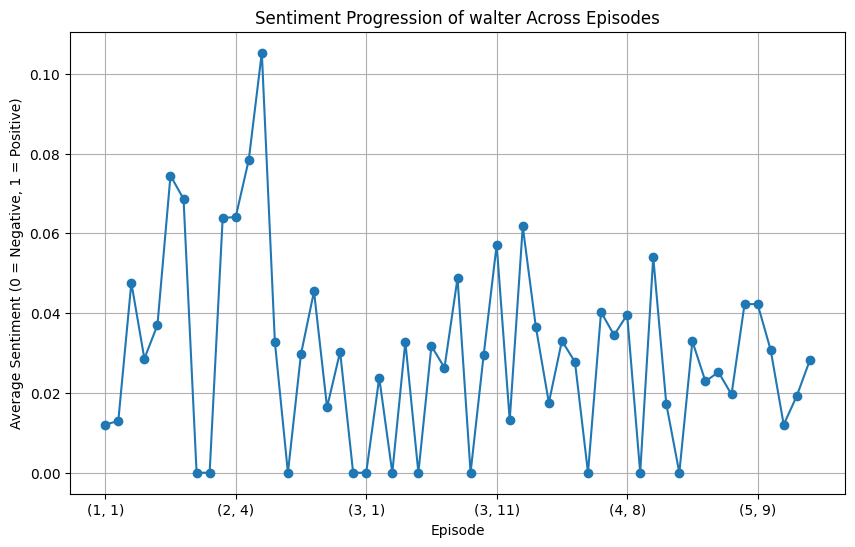

In [37]:
char_df['naive_bayes_prediction'] = nb_model.predict(vectorizer.transform(char_df['Texto']))

# Group by 'Temporada' and 'Episodio', and calculate the mean of 'naive_bayes_prediction'
episode_sentiment = char_df.groupby(['Temporada', 'Episodio'])['naive_bayes_prediction'].mean()

# Check the result
print(episode_sentiment)


# Plot the sentiment progression across episodes
plt.figure(figsize=(10, 6))
episode_sentiment.plot(kind='line', marker='o')
plt.title(f"Sentiment Progression of {character_name} Across Episodes")
plt.xlabel("Episode")
plt.ylabel("Average Sentiment (0 = Negative, 1 = Positive)")
plt.grid(True)
plt.show()

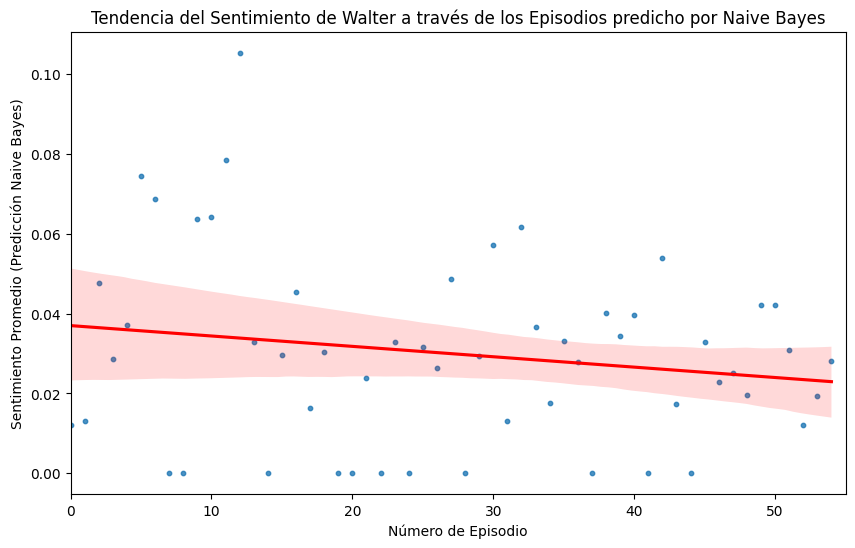

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Resetear el índice de los datos agrupados para que 'Temporada' y 'Episodio' sean columnas accesibles
episode_sentiment = episode_sentiment.reset_index()

# Crear un número de episodio secuencial basado en la longitud del DataFrame
episode_sentiment['Episode_Number'] = range(len(episode_sentiment))

# Establecer el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar una línea de sentimiento de los episodios con una línea de tendencia usando Seaborn
sns.regplot(x='Episode_Number', y='naive_bayes_prediction', data=episode_sentiment,
            scatter_kws={"s": 10}, line_kws={"color": "red"})

# Añadir etiquetas y título
plt.xlabel('Número de Episodio')
plt.ylabel('Sentimiento Promedio (Predicción Naive Bayes)')
plt.title('Tendencia del Sentimiento de Walter a través de los Episodios predicho por Naive Bayes')

plt.xlim(0, len(episode_sentiment))
plt.show()